In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/insurance.csv'

Mounted at /content/drive


Using Bagging model,I predicted the insurance premium for the
members of a county with 75% score.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

In [ ]:
df=pd.read_csv(path)
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
for i in df.columns:
  print(df[i].isnull().sum())

0
0
0
0
0
0
0


In [ ]:
df_numeric=df.select_dtypes(include='number')
df_numeric=df_numeric.drop('charges',axis=1)

In [ ]:
def visualize_boxplot(column_name):
  sns.boxplot(data=df_numeric,x=df_numeric[column_name])
  plt.show()

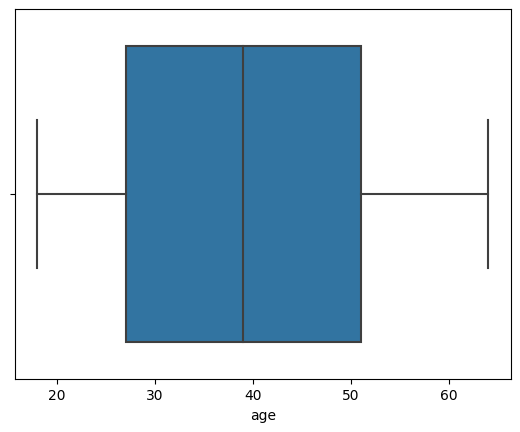

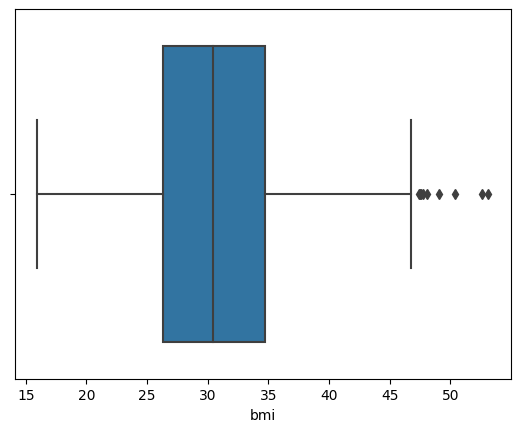

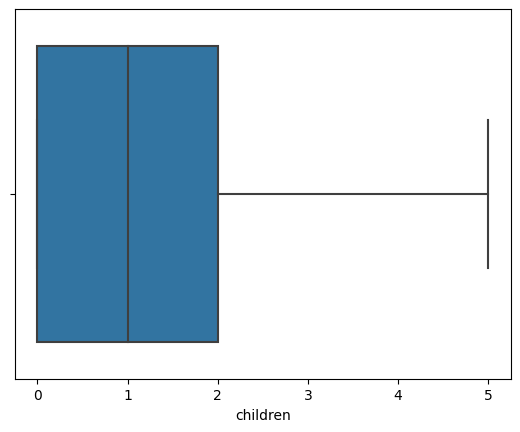

In [ ]:
for i in df_numeric.columns:
  visualize_boxplot(i)

In [ ]:
#Only bmi column has outliers
q1=df_numeric['bmi'].quantile(0.25)
q3=df_numeric['bmi'].quantile(0.75)
iqr=q3-q1
lower_lim=q1-(1.5*iqr)
upper_lim=q3+(1.5*iqr)
for i in df['bmi']:
  if i<lower_lim:
    df_numeric['bmi']=df_numeric['bmi'].replace(i,lower_lim)
  if i>upper_lim:
    df_numeric['bmi']=df_numeric['bmi'].replace(i,upper_lim)

<Axes: xlabel='bmi'>

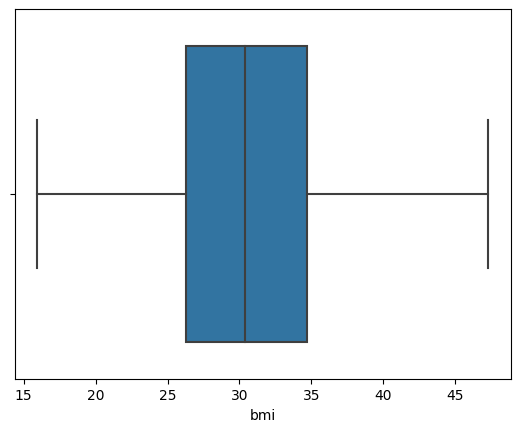

In [ ]:
sns.boxplot(data=df_numeric,x=df_numeric['bmi'])

In [ ]:
y=df['charges']

In [ ]:
for i in df.columns:
  if df[i].dtype!='object':
    df=df.drop(i,axis=1)
df=pd.concat([df,df_numeric],axis=1)

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
X=df
print(X.head())

   age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0         0           1                 0   
1   18  33.770         1         1           0                 0   
2   28  33.000         3         1           0                 0   
3   33  22.705         0         1           0                 1   
4   32  28.880         0         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
model=BaggingRegressor(bootstrap=True,bootstrap_features=True,oob_score=True,n_estimators=100,max_samples=0.67).fit(X_train,y_train)

In [ ]:
training_score=model.score(X_train,y_train)
print(training_score)

0.8983157919954131


In [ ]:
testing_score=model.score(X_test,y_test)
print(testing_score)

0.747181132361687
